## 閾値除去50μV、全端子加算平均、各端子加算平均、全体のERP比較（影付き）、個人ごとのERP比較

### 使用脳波データ
### ・XX_threshold_50_data内、datファイル



### data_EEG = 
### image_stimulus(HLでソート)
### × channel(AF3, AFz, AF4, F3, Fz, F4) 
### × frame(500fpsなので、550frames)
### data_EEG.shape = (259, 6, 550)

### label =  
### image_stimulus(HLでソート)
### × HL

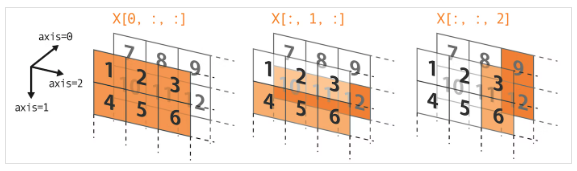

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import numpy as np
import seaborn as sns
import math
from scipy import stats

In [2]:
files = ["filename1", "filename2", "filename3",]
images = 259
frames = 550
channels = 6

### 全端子加算平均のERP比較（HL条件ごと）その１　全部いっぺんにプロット

In [ ]:
# 全端子加算平均のERP比較
# HL条件ごと対するERPの描画

color = ['red', '#1d4e89', '#00b2ca', '#7dcfb6', '#fbd1a2', '#f79256']
color_2 = ['#ea7317', '#2364aa', '#73bfb8']
color_3 = ['red', 'blue', 'green', 'orange', 'purple']
ch_name = ['AF3', 'AFz', 'AF4', 'F3', 'Fz', 'F4']

# labelデータ取得用
with open(f'../dataset/XX_threshold_50_data/{files[0]}_threshold_50.dat', mode='rb') as f:
            data_EEG = pickle.load(f)
            label = pickle.load(f)
            
# HL範囲のインデックス取得
HL = label[:, 1].astype(np.float32)
idx_human = np.where(HL>=100)
idx_100_90 = np.where((HL<100)&(HL>=90))
idx_90_80 = np.where((HL<90)&(HL>=80))
idx_80_70 = np.where((HL<80)&(HL>=70))
idx_70_60 = np.where((HL<70)&(HL>=60))
idx_60_50 = np.where((HL<60)&(HL>=50))

idx_100_80 = np.where((HL<100)&(HL>=80))
idx_80_60 = np.where((HL<80)&(HL>=60))
idx_60_40 = np.where((HL<60)&(HL>=40))
idx_40_20 = np.where((HL<40)&(HL>=20))
idx_20_0 = np.where((HL<20)&(HL>=0))

data_all = [idx_human, idx_100_80, idx_80_60, idx_60_40, idx_40_20, idx_20_0] 
data_high = [idx_100_90, idx_90_80, idx_80_70, idx_70_60, idx_60_50]
graphlabel = ['ALL', 'Robot(100~90)', 'Robot(90~80)', 'Robot(80~70)', 'Robot(70~60)', 'Robot(60~50)']

data_EEG_all_sub = np.zeros((images, channels, frames, len(files)))
data_EEG_all_channel = np.zeros((images, frames))

#  個人ごとのデータを取得
for file in range(len(files)):
    with open(f'../dataset/XX_threshold_50_data/{files[file]}_threshold_50.dat', mode='rb') as f:
        data_EEG = pickle.load(f)
        label = pickle.load(f)
        
    # チャネルごと、提示画像ごとに被験者データを束ねる
    data_EEG_all_sub[:, :, :, file] = data_EEG
        
# 平均を出す
data_EEG_all_channel = np.nanmean(data_EEG_all_sub, axis = (1, 3))


# HLごとにグラフ化

fig = plt.figure(figsize = (300,200))
plt.subplots(2, 3, figsize=(90,45))
plt.suptitle('ALL channel', fontsize = 80)

x = np.linspace(-100, 1000, 550)

plt.subplot(2, 3, 1)
for i in range(len(data_all)):
    plt.title(f'{graphlabel[0]}', fontsize = 40)
    plt.plot(x, np.mean(data_EEG_all_channel[data_all[i]], axis = 0),  lw=4, color = color[i])
    plt.legend(labels=["Human", "Robot(80~100)", "Robot(60~80)", "Robot(40~60)", "Robot(20~40)", "Robot(0~20)"], fontsize=40, loc='lower right')
plt.ylim(-5, 2)
plt.xlim(-100, 1000)
plt.xlabel('Time (ms)',fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel('Potential (μV)',fontsize=30)
plt.yticks(fontsize=30)

plt.hlines(y=0, xmin=-100, xmax=1000, color = 'k')
plt.vlines(x=0, ymin=-100, ymax=1000, color = 'k')
plt.grid()

for i in range(len(data_high)):
    plt.subplot(2, 3, i+2)
    plt.title(f'{graphlabel[i+1]}', color=color_3[i], fontsize = 40)
    plt.plot(x, np.mean(data_EEG_all_channel[idx_human], axis = 0),  lw=4, color = 'black')
    plt.plot(x, np.mean(data_EEG_all_channel[data_high[i]], axis = 0),  lw=4, color = color_3[i])
    plt.legend(labels=["Human", f"{graphlabel[i+1]}"], fontsize=40, loc='lower right')

    plt.ylim(-5, 2)
    plt.xlim(-100, 1000)
    plt.xlabel('Time (ms)',fontsize=30)
    plt.xticks(fontsize=30)
    plt.ylabel('Potential (μV)',fontsize=30)
    plt.yticks(fontsize=30)

    plt.hlines(y=0, xmin=-100, xmax=1000, color = 'k')
    plt.vlines(x=0, ymin=-100, ymax=1000, color = 'k')
    plt.grid()

    
plt.show()
# fig.savefig(f'../dataset_for_analysis/ERP_HL.png')


### 全端子加算平均のERP比較（HL条件ごと）その2　全部いっぺんにプロットで影あり

In [ ]:
# 全端子加算平均のERP比較1
# HL条件ごと対するERPの描画

color = ['red', '#1d4e89', '#00b2ca', '#7dcfb6', '#fbd1a2', '#f79256']
color_2 = ['#ea7317', '#2364aa', '#73bfb8']
color_3 = ['red', 'blue', 'green', 'orange', 'purple']
ch_name = ['AF3', 'AFz', 'AF4', 'F3', 'Fz', 'F4']

# labelデータ取得用
with open(f'../dataset/XX_threshold_50_data/{files[0]}_threshold_50.dat', mode='rb') as f:
            data_EEG = pickle.load(f)
            label = pickle.load(f)
            
# HL範囲のインデックス取得
HL = label[:, 1].astype(np.float32)
idx_human = np.where(HL>=100)
idx_100_90 = np.where((HL<100)&(HL>=90))
idx_90_80 = np.where((HL<90)&(HL>=80))
idx_80_70 = np.where((HL<80)&(HL>=70))
idx_70_60 = np.where((HL<70)&(HL>=60))
idx_60_50 = np.where((HL<60)&(HL>=50))

idx_100_80 = np.where((HL<100)&(HL>=80))
idx_80_60 = np.where((HL<80)&(HL>=60))
idx_60_40 = np.where((HL<60)&(HL>=40))
idx_40_20 = np.where((HL<40)&(HL>=20))
idx_20_0 = np.where((HL<20)&(HL>=0))

data_all = [idx_human, idx_100_80, idx_80_60, idx_60_40, idx_40_20, idx_20_0] 
data_high = [idx_100_90, idx_90_80, idx_80_70, idx_70_60, idx_60_50]
graphlabel = ['ALL', 'Robot(100~90)', 'Robot(90~80)', 'Robot(80~70)', 'Robot(70~60)', 'Robot(60~50)']

data_EEG_all_sub = np.zeros((images, channels, frames, len(files)))
data_EEG_all_channel = np.zeros((images, frames))

#  個人ごとのデータを取得
for file in range(len(files)):
    with open(f'../dataset/XX_threshold_50_data/{files[file]}_threshold_50.dat', mode='rb') as f:
        data_EEG = pickle.load(f)
        label = pickle.load(f)
        
    # チャネルごと、提示画像ごとに被験者データを束ねる
    data_EEG_all_sub[:, :, :, file] = data_EEG
        
# 平均を出す
data_EEG_all_channel = np.nanmean(data_EEG_all_sub, axis = (1, 3))


# HLごとにグラフ化

fig = plt.figure(figsize = (30,20))
plt.subplots(2, 3, figsize=(30,15))
plt.suptitle('ALL channel', fontsize = 20)

x = np.linspace(-100, 1000, 550)

# plt.subplot(2, 3, 1)
# for i in range(len(data_all)):
#     plt.title(f'{graphlabel[0]}', fontsize = 40)
#     plt.plot(x, np.mean(data_EEG_all_channel[data_all[i]], axis = 0),  lw=4, color = color[i])
#     plt.legend(labels=["Human", "Robot(80~100)", "Robot(60~80)", "Robot(40~60)", "Robot(20~40)", "Robot(0~20)"], fontsize=40, loc='lower right')
# plt.ylim(-5, 2)
# plt.xlim(-100, 1000)
# plt.xlabel('Time (ms)',fontsize=30)
# plt.xticks(fontsize=30)
# plt.ylabel('Potential (μV)',fontsize=30)
# plt.yticks(fontsize=30)

# plt.hlines(y=0, xmin=-100, xmax=1000, color = 'k')
# plt.vlines(x=0, ymin=-100, ymax=1000, color = 'k')
# plt.grid()

for i in range(1, len(data_high)+1):
    plt.subplot(2, 3, i)
    plt.title(f'{graphlabel[i]}', color=color_3[i-1], fontsize = 30)
    plt.plot(x, np.mean(data_EEG_all_channel[idx_human], axis = 0),  lw=2, color = 'black')
    plt.plot(x, np.mean(data_EEG_all_channel[data_high[i-1]], axis = 0),  lw=2, color = color_3[i-1])
    plt.legend(labels=["Human", f"{graphlabel[i]}"], fontsize=15, loc='lower right')

    plt.ylim(-5, 2)
    plt.xlim(-100, 1000)
    plt.xlabel('Time (ms)',fontsize=20)
    plt.xticks(fontsize=15)
    plt.ylabel('Potential (μV)',fontsize=20)
    plt.yticks(fontsize=15)
    plt.minorticks_on()
    
    if i==1:
        plt.axvspan(400, 600, color="gray", alpha=0.3)

    
    plt.hlines(y=0, xmin=-100, xmax=1000, color = 'k', lw=2)
    plt.vlines(x=0, ymin=-100, ymax=1000, color = 'k', lw=2)
    plt.grid()

    
plt.show()
# fig.savefig(f'../dataset_for_analysis/ERP_HL.png')


In [ ]:
# 全端子加算平均のERP比較2
# HL条件ごと対するERPの描画

color = ['red', '#1d4e89', '#00b2ca', '#7dcfb6', '#fbd1a2', '#f79256']
color_2 = ['#ea7317', '#2364aa', '#73bfb8']
color_3 = ['red', 'blue', 'green', 'orange', 'purple']
ch_name = ['AF3', 'AFz', 'AF4', 'F3', 'Fz', 'F4']

# labelデータ取得用
with open(f'../dataset/XX_threshold_50_data/{files[0]}_threshold_50.dat', mode='rb') as f:
            data_EEG = pickle.load(f)
            label = pickle.load(f)
            
# HL範囲のインデックス取得
HL = label[:, 1].astype(np.float32)
idx_human = np.where(HL>=100)
idx_100_90 = np.where((HL<100)&(HL>=90))
idx_90_80 = np.where((HL<90)&(HL>=80))
idx_80_70 = np.where((HL<80)&(HL>=70))
idx_70_60 = np.where((HL<70)&(HL>=60))
idx_60_50 = np.where((HL<60)&(HL>=50))

idx_50_40 = np.where((HL<50)&(HL>=40))
idx_40_30 = np.where((HL<40)&(HL>=30))
idx_30_20 = np.where((HL<30)&(HL>=20))
idx_20_10 = np.where((HL<20)&(HL>=10))
idx_10_0 = np.where((HL<10)&(HL>=0))

data_high = [idx_100_90, idx_90_80, idx_80_70, idx_70_60, idx_60_50]
data_low = [idx_50_40, idx_40_30, idx_30_20, idx_20_10, idx_10_0] 
graphlabel = ['ALL', 'Robot(100~90)', 'Robot(90~80)', 'Robot(80~70)', 'Robot(70~60)', 'Robot(60~50)', 
             'Robot(50~40)', 'Robot(40~30)', 'Robot(30~20)', 'Robot(20~10)', 'Robot(10~0)']

data_EEG_all_sub = np.zeros((images, channels, frames, len(files)))
data_EEG_all_channel = np.zeros((images, frames))

#  個人ごとのデータを取得
for file in range(len(files)):
    with open(f'../dataset/XX_threshold_50_data/{files[file]}_threshold_50.dat', mode='rb') as f:
        data_EEG = pickle.load(f)
        label = pickle.load(f)
        
    # チャネルごと、提示画像ごとに被験者データを束ねる
    data_EEG_all_sub[:, :, :, file] = data_EEG
        
# 平均を出す
data_EEG_all_channel = np.nanmean(data_EEG_all_sub, axis = (1, 3))


# HLごとにグラフ化

fig = plt.figure(figsize = (30,20))
plt.subplots(2, 3, figsize=(30,15))
plt.suptitle('ALL channel', fontsize = 20)

x = np.linspace(-100, 1000, 550)

# plt.subplot(2, 3, 1)
# for i in range(len(data_all)):
#     plt.title(f'{graphlabel[0]}', fontsize = 40)
#     plt.plot(x, np.mean(data_EEG_all_channel[data_all[i]], axis = 0),  lw=4, color = color[i])
#     plt.legend(labels=["Human", "Robot(80~100)", "Robot(60~80)", "Robot(40~60)", "Robot(20~40)", "Robot(0~20)"], fontsize=40, loc='lower right')
# plt.ylim(-5, 2)
# plt.xlim(-100, 1000)
# plt.xlabel('Time (ms)',fontsize=30)
# plt.xticks(fontsize=30)
# plt.ylabel('Potential (μV)',fontsize=30)
# plt.yticks(fontsize=30)

# plt.hlines(y=0, xmin=-100, xmax=1000, color = 'k')
# plt.vlines(x=0, ymin=-100, ymax=1000, color = 'k')
# plt.grid()

for i in range(1, len(data_low)+1):
    plt.subplot(2, 3, i)
    plt.title(f'{graphlabel[i+5]}', color='black', fontsize = 30)
    plt.plot(x, np.mean(data_EEG_all_channel[idx_human], axis = 0),  lw=2, color = 'black')
    plt.plot(x, np.mean(data_EEG_all_channel[data_low[i-1]], axis = 0),  lw=2, color = 'gray')
    plt.legend(labels=["Human", f"{graphlabel[i+5]}"], fontsize=15, loc='lower right')

    plt.ylim(-5, 2)
    plt.xlim(-100, 1000)
    plt.xlabel('Time (ms)',fontsize=20)
    plt.xticks(fontsize=15)
    plt.ylabel('Potential (μV)',fontsize=20)
    plt.yticks(fontsize=15)
    plt.minorticks_on()
    
#     if i==1:
#         plt.axvspan(400, 600, color="gray", alpha=0.3)

    
    plt.hlines(y=0, xmin=-100, xmax=1000, color = 'k', lw=2)
    plt.vlines(x=0, ymin=-100, ymax=1000, color = 'k', lw=2)
    plt.grid()

    
plt.show()
# fig.savefig(f'../dataset_for_analysis/ERP_HL.png')


### 全端子加算平均　22人分（22本）の平均&平均+-標準偏差/√6（チャネル数）の影

In [ ]:
# 全端子加算平均のERP比較
# HL条件ごと対するERPの描画
# 被験者22人それぞれのグラフをプロット


color = ['red', '#1d4e89', '#00b2ca', '#7dcfb6', '#fbd1a2', '#f79256']
color_2 = ['#ea7317', '#2364aa', '#73bfb8']
color_3 = ['red', 'blue', 'green', 'orange', 'purple']
color_4 = ['black', 'red', 'blue', 'green', 'orange', 'purple']
ch_name = ['AF3', 'AFz', 'AF4', 'F3', 'Fz', 'F4']

# labelデータ取得用
with open(f'../dataset/XX_threshold_50_data/{files[0]}_threshold_50.dat', mode='rb') as f:
            data_EEG = pickle.load(f)
            label = pickle.load(f)
            
# HL範囲のインデックス取得
HL = label[:, 1].astype(np.float32)
idx_human = np.where(HL>=100)
idx_100_90 = np.where((HL<100)&(HL>=90))
idx_90_80 = np.where((HL<90)&(HL>=80))
idx_80_70 = np.where((HL<80)&(HL>=70))
idx_70_60 = np.where((HL<70)&(HL>=60))
idx_60_50 = np.where((HL<60)&(HL>=50))

# idx_100_80 = np.where((HL<100)&(HL>=80))
# idx_80_60 = np.where((HL<80)&(HL>=60))
# idx_60_40 = np.where((HL<60)&(HL>=40))
# idx_40_20 = np.where((HL<40)&(HL>=20))
# idx_20_0 = np.where((HL<20)&(HL>=0))

# data_all = [idx_human, idx_100_80, idx_80_60, idx_60_40, idx_40_20, idx_20_0] 
data_high = [idx_human, idx_100_90, idx_90_80, idx_80_70, idx_70_60, idx_60_50]
graphlabel = ['Human', 'Robot(100~90)', 'Robot(90~80)', 'Robot(80~70)', 'Robot(70~60)', 'Robot(60~50)']

data_EEG_all_sub = np.zeros((images, channels, frames, len(files)))
data_EEG_sub = np.zeros((images, frames, len(files)))

#  個人ごとのデータを取得
for file in range(len(files)):
    with open(f'../dataset/XX_threshold_50_data/{files[file]}_threshold_50.dat', mode='rb') as f:
        data_EEG = pickle.load(f)
        label = pickle.load(f)
        
    # チャネルごと、提示画像ごとに被験者データを束ねる
    data_EEG_all_sub[:, :, :, file] = data_EEG
        
# チャネル潰した平均を出す
data_EEG_sub = np.nanmean(data_EEG_all_sub, axis = 1)


# HLごとにグラフ化
fig = plt.figure(figsize = (50,50))
# plt.subplots(2, 3, figsize=(25,25))
plt.subplots(2, 3, figsize=(30,15))
plt.suptitle('ALL channel', fontsize = 20)

x = np.linspace(-100, 1000, 550)

data1, m1, std1 = [], [], []
data2, m2, std2 = [], [], []

# humanのみプロット
# plt.subplot(2, 3, 1)
# plt.title(f'{graphlabel[0]}', color=color_4[0], fontsize = 30)

# # m1にhumanの平均,std1にその標準偏差
# data1 = np.nanmean(data_EEG_sub[data_high[0], :, :], axis = (0, 1))
# m1 = np.nanmean(data1, axis=1)
# std1 =np.nanstd(data1, axis=1)
# # humanの平均と平均+-標準偏差/√6の幅のプロット

# plt.fill_between(x, m1 + (std1/math.sqrt(channels)), m1 - (std1/math.sqrt(channels)), alpha=0.2,  lw=4, color = color_4[0])
# plt.plot(x, m1, color = color_4[0])

# plt.legend(labels=[f"{graphlabel[0]}"], fontsize=20, loc='lower right')

# plt.ylim(-7.5, 2.5)
# plt.xlim(-100, 1000)
# plt.xlabel('Time (ms)',fontsize=20)
# plt.xticks(fontsize=15)
# plt.ylabel('Potential (μV)',fontsize=20)
# plt.yticks(fontsize=15)

# plt.hlines(y=0, xmin=-100, xmax=1000, color = 'k')
# plt.vlines(x=0, ymin=-100, ymax=1000, color = 'k')
# plt.grid()

for i in range(1, len(data_high)):
    data1, m1, std1 = [], [], []
    data2, m2, std2 = [], [], []
    
#     plt.subplot(3, 2, i)
    plt.subplot(2, 3, i)
    plt.title(f'{graphlabel[i]}', color=color_4[i], fontsize = 25)
    
    # m1にhumanの平均,std1にその標準偏差
    data1 = np.nanmean(data_EEG_sub[data_high[0], :, :], axis = (0, 1))
    m1 = np.nanmean(data1, axis=1)
    std1 =np.nanstd(data1, axis=1)
    
    # m2にそれぞれのHLの平均,std2にその標準偏差
    data2 = np.mean(data_EEG_sub[data_high[i], :, :], axis =  (0, 1))
    m2 = np.nanmean(data2, axis=1)
    std2 = np.nanstd(data2, axis=1)
    
    # humanの平均と平均+-標準偏差/√6の幅のプロット
    plt.fill_between(x, m1 + (std1/math.sqrt(channels)), m1 - (std1/math.sqrt(channels)), alpha=0.15,  lw=2, color = color_4[0])
    plt.plot(x, m1, color = color_4[0])
    # それぞれのHLの平均と平均+-標準偏差/√6の幅のプロット
    plt.fill_between(x, m2 + (std2/math.sqrt(channels)), m2 - (std2/math.sqrt(channels)), alpha=0.15,  lw=2, color = color_4[i])
    plt.plot(x, m2, color = color_4[i])
    
    plt.legend(labels=[f"{graphlabel[0]}", f"{graphlabel[i]}"], fontsize=12, loc='lower right')

    plt.ylim(-6.5, 2.5)
    plt.xlim(-100, 1000)
    plt.xlabel('Time (ms)',fontsize=20)
    plt.xticks(fontsize=15)
    plt.ylabel('Potential (μV)',fontsize=20)
    plt.yticks(fontsize=15)
    plt.minorticks_on()

    plt.hlines(y=0, xmin=-100, xmax=1000, color = 'k', lw=1)
    plt.vlines(x=0, ymin=-100, ymax=1000, color = 'k', lw=1)
#     plt.grid()

    
plt.show()
# fig.savefig(f'../dataset_for_analysis/ERP_HL_sub.png')


### 各端子加算平均　22人分（22本）の平均&平均+-標準偏差/√6（チャネル数）の影

In [ ]:
# 各端子加算平均のERP比較
# HL条件ごと対するERPの描画

color = ['red', '#1d4e89', '#00b2ca', '#7dcfb6', '#fbd1a2', '#f79256']
color_2 = ['#ea7317', '#2364aa', '#73bfb8']
color_3 = ['red', 'blue', 'green', 'orange', 'purple']
color_4 = ['black', 'red', 'blue', 'green', 'orange', 'purple']
ch_name = ['AF3', 'AFz', 'AF4', 'F3', 'Fz', 'F4']

# labelデータ取得用
with open(f'../dataset/XX_threshold_50_data/{files[0]}_threshold_50.dat', mode='rb') as f:
            data_EEG = pickle.load(f)
            label = pickle.load(f)
            
# HL範囲のインデックス取得
HL = label[:, 1].astype(np.float32)
idx_human = np.where(HL>=100)
idx_100_90 = np.where((HL<100)&(HL>=90))
idx_90_80 = np.where((HL<90)&(HL>=80))
idx_80_70 = np.where((HL<80)&(HL>=70))
idx_70_60 = np.where((HL<70)&(HL>=60))
idx_60_50 = np.where((HL<60)&(HL>=50))

data_high = [idx_human, idx_100_90, idx_90_80, idx_80_70, idx_70_60, idx_60_50]
graphlabel = ['Human', 'Robot(100~90)', 'Robot(90~80)', 'Robot(80~70)', 'Robot(70~60)', 'Robot(60~50)']

data_EEG_all_sub = np.zeros((images, channels, frames, len(files)))
# data_EEG_channel = np.zeros((images, channels, frames))

#  個人ごとのデータを取得
for file in range(len(files)):
    with open(f'../dataset/XX_threshold_50_data/{files[file]}_threshold_50.dat', mode='rb') as f:
        data_EEG = pickle.load(f)
        label = pickle.load(f)
        
    # チャネルごと、提示画像ごとに被験者データを束ねる
    data_EEG_all_sub[:, :, :, file] = data_EEG
        
# 平均を出す
# data_EEG_channel = np.nanmean(data_EEG_all_sub, axis = 3)


# HLごとにグラフ化
plt.subplots(6, 5, figsize=(150,135))
plt.suptitle('each channel', fontsize = 10)

x = np.linspace(-100, 1000, 550)
for channel in range(channels):
    data1, m1, std1 = [], [], []
    data2, m2, std2 = [], [], []

    
    for i in range(1, len(data_high)):
        plt.subplot(6, 5, channel*5+i)
        plt.title(f'{graphlabel[i]}_{ch_name[channel]}', color=color_4[i], fontsize = 40)
        
        data1, m1, std1 = [], [], []
        data2, m2, std2 = [], [], []

        # m1にhumanの平均,std1にその標準偏差
        data1 = np.nanmean(data_EEG_all_sub[data_high[0], channel, :, :], axis = (0, 1))
        m1 = np.nanmean(data1, axis=1)
        std1 =np.nanstd(data1, axis=1)

        # m2にそれぞれのHLの平均,std2にその標準偏差
        data2 = np.mean(data_EEG_all_sub[data_high[i], channel, :, :], axis =  (0, 1))
        m2 = np.nanmean(data2, axis=1)
        std2 = np.nanstd(data2, axis=1)

        # humanの平均と平均+-標準偏差/√6の幅のプロット
        plt.fill_between(x, m1 + (std1/math.sqrt(channels)), m1 - (std1/math.sqrt(channels)), alpha=0.2,  lw=4, color = color_4[0])
        plt.plot(x, m1, color = color_4[0])
        # それぞれのHLの平均と平均+-標準偏差/√6の幅のプロット
        plt.fill_between(x, m2 + (std2/math.sqrt(channels)), m2 - (std2/math.sqrt(channels)), alpha=0.2,  lw=4, color = color_4[i])
        plt.plot(x, m2, color = color_4[i])

        plt.legend(labels=[f"{graphlabel[0]}", f"{graphlabel[i]}"], fontsize=40, loc='lower right')
        
        plt.ylim(-10, 10)
        plt.xlim(-100, 1000)
        plt.xlabel('Time (ms)',fontsize=30)
        plt.xticks(fontsize=30)
        plt.ylabel('Potential (μV)',fontsize=30)
        plt.yticks(fontsize=30)

        plt.hlines(y=0, xmin=-100, xmax=1000, color = 'k')
        plt.vlines(x=0, ymin=-100, ymax=1000, color = 'k')
        plt.grid()



plt.show()
# fig.savefig(f'../dataset_for_analysis/ERP_HL_each_channel_sub.png')


### 全端子加算平均、HLごと、被験者22人それぞれの波形

In [ ]:
# 全端子加算平均のERP比較
# 被験者22人それぞれのグラフをプロット


color = ['red', '#1d4e89', '#00b2ca', '#7dcfb6', '#fbd1a2', '#f79256']
color_2 = ['#ea7317', '#2364aa', '#73bfb8']
color_3 = ['red', 'blue', 'green', 'orange', 'purple']
color_4 = ['black', 'red', 'blue', 'green', 'orange', 'purple']
ch_name = ['AF3', 'AFz', 'AF4', 'F3', 'Fz', 'F4']

# labelデータ取得用
with open(f'../dataset/XX_threshold_50_data/{files[0]}_threshold_50.dat', mode='rb') as f:
            data_EEG = pickle.load(f)
            label = pickle.load(f)
            
# HL範囲のインデックス取得
HL = label[:, 1].astype(np.float32)
idx_human = np.where(HL>=100)
idx_100_90 = np.where((HL<100)&(HL>=90))
idx_90_80 = np.where((HL<90)&(HL>=80))
idx_80_70 = np.where((HL<80)&(HL>=70))
idx_70_60 = np.where((HL<70)&(HL>=60))
idx_60_50 = np.where((HL<60)&(HL>=50))

# idx_100_80 = np.where((HL<100)&(HL>=80))
# idx_80_60 = np.where((HL<80)&(HL>=60))
# idx_60_40 = np.where((HL<60)&(HL>=40))
# idx_40_20 = np.where((HL<40)&(HL>=20))
# idx_20_0 = np.where((HL<20)&(HL>=0))

# data_all = [idx_human, idx_100_80, idx_80_60, idx_60_40, idx_40_20, idx_20_0] 
data_high = [idx_human, idx_100_90, idx_90_80, idx_80_70, idx_70_60, idx_60_50]
graphlabel = ['Human', 'Robot(100~90)', 'Robot(90~80)', 'Robot(80~70)', 'Robot(70~60)', 'Robot(60~50)']

data_EEG_all_sub = np.zeros((images, channels, frames, len(files)))
data_EEG_sub = np.zeros((images, frames, len(files)))

#  個人ごとのデータを取得
for file in range(len(files)):
    with open(f'../dataset/XX_threshold_50_data/{files[file]}_threshold_50.dat', mode='rb') as f:
        data_EEG = pickle.load(f)
        label = pickle.load(f)
        
    # チャネルごと、提示画像ごとに被験者データを束ねる
    data_EEG_all_sub[:, :, :, file] = data_EEG
        
# 平均を出す
data_EEG_sub = np.nanmean(data_EEG_all_sub, axis = 1)


# 個人ごとにグラフ化
plt.subplots(5, 5, figsize=(150,135))
plt.suptitle('each subject', fontsize = 100)

x = np.linspace(-100, 1000, 550)


for file in range(len(files)):
    plt.subplot(5, 5, file+1)
    plt.title(f'{files[file]}', fontsize = 40)
    
    data_h, m_h = [], []
    
    data_h = np.nanmean(data_EEG_sub[data_high[0], :, file], axis =  0)
    m_h = np.nanmean(data_h, axis=0)
    plt.plot(x, m_h,  lw=4, color = color_4[0])
    
    for i in range(1, len(data_high)):
        data, m = [], []
        data = np.nanmean(data_EEG_sub[data_high[i], :, file], axis =  0)
        m = np.nanmean(data, axis=0)

        plt.plot(x, m,  lw=4, color = color_4[i])
        
    plt.legend(labels=list(map(lambda x :f"{graphlabel[x]}", range(len(data_high)))), fontsize=40, loc='lower right')

    plt.ylim(-25, 25)
    plt.xlim(-100, 1000)
    plt.xlabel('Time (ms)',fontsize=30)
    plt.xticks(fontsize=30)
    plt.ylabel('Potential (μV)',fontsize=30)
    plt.yticks(fontsize=30)

    plt.hlines(y=0, xmin=-100, xmax=1000, color = 'k')
    plt.vlines(x=0, ymin=-100, ymax=1000, color = 'k')
    plt.grid()

    
plt.show()
# fig.savefig(f'../dataset_for_analysis/ERP_HL_sub.png')




## 人とHL100~90

### 全端子加算平均のERP比較（被験者ごと）

In [ ]:
# 全端子加算平均のERP比較
# 被験者22人それぞれのグラフをプロット


color = ['red', '#1d4e89', '#00b2ca', '#7dcfb6', '#fbd1a2', '#f79256']
color_2 = ['#ea7317', '#2364aa', '#73bfb8']
color_3 = ['red', 'blue', 'green', 'orange', 'purple']
color_4 = ['black', 'red', 'blue', 'green', 'orange', 'purple']
ch_name = ['AF3', 'AFz', 'AF4', 'F3', 'Fz', 'F4']

# labelデータ取得用
with open(f'../dataset/XX_threshold_50_data/{files[0]}_threshold_50.dat', mode='rb') as f:
            data_EEG = pickle.load(f)
            label = pickle.load(f)
            
# HL範囲のインデックス取得
HL = label[:, 1].astype(np.float32)
idx_human = np.where(HL>=100)
idx_100_90 = np.where((HL<100)&(HL>=90))
idx_90_80 = np.where((HL<90)&(HL>=80))
idx_80_70 = np.where((HL<80)&(HL>=70))
idx_70_60 = np.where((HL<70)&(HL>=60))
idx_60_50 = np.where((HL<60)&(HL>=50))

# idx_100_80 = np.where((HL<100)&(HL>=80))
# idx_80_60 = np.where((HL<80)&(HL>=60))
# idx_60_40 = np.where((HL<60)&(HL>=40))
# idx_40_20 = np.where((HL<40)&(HL>=20))
# idx_20_0 = np.where((HL<20)&(HL>=0))

# data_all = [idx_human, idx_100_80, idx_80_60, idx_60_40, idx_40_20, idx_20_0] 
data_high = [idx_human, idx_100_90, idx_90_80, idx_80_70, idx_70_60, idx_60_50]
graphlabel = ['Human', 'Robot(100~90)', 'Robot(90~80)', 'Robot(80~70)', 'Robot(70~60)', 'Robot(60~50)']

data_EEG_all_sub = np.zeros((images, channels, frames, len(files)))
data_EEG_sub = np.zeros((images, frames, len(files)))

#  個人ごとのデータを取得
for file in range(len(files)):
    with open(f'../dataset/XX_threshold_50_data/{files[file]}_threshold_50.dat', mode='rb') as f:
        data_EEG = pickle.load(f)
        label = pickle.load(f)
        
    # チャネルごと、提示画像ごとに被験者データを束ねる
    data_EEG_all_sub[:, :, :, file] = data_EEG
        
# 平均を出す
data_EEG_sub = np.nanmean(data_EEG_all_sub, axis = 1)


# 個人ごとにグラフ化

for i in range(1, len(data_high)):

    plt.subplots(5, 5, figsize=(150,135))
    plt.suptitle(f'each subject {(graphlabel[i])}', fontsize = 100)

    x = np.linspace(-100, 1000, 550)

    for file in range(len(files)):
        plt.subplot(5, 5, file+1)
        plt.title(f'{files[file]}', fontsize = 40)

        data_h, m_h = [], []
        data, m = [], []

        data_h = np.nanmean(data_EEG_sub[data_high[0], :, file], axis =  0)
        m_h = np.nanmean(data_h, axis=0)
        plt.plot(x, m_h,  lw=4, color = color_4[0])

        data = np.nanmean(data_EEG_sub[data_high[i], :, file], axis =  0)
        m = np.nanmean(data, axis=0)
        plt.plot(x, m,  lw=4, color = color_4[i])

        plt.legend(labels=[f"{graphlabel[0]}", f"{graphlabel[i]}"], fontsize=40, loc='lower right')

        plt.ylim(-25, 25)
        plt.xlim(-100, 1000)
        plt.xlabel('Time (ms)',fontsize=30)
        plt.xticks(fontsize=30)
        plt.ylabel('Potential (μV)',fontsize=30)
        plt.yticks(fontsize=30)

        plt.hlines(y=0, xmin=-100, xmax=1000, color = 'k')
        plt.vlines(x=0, ymin=-100, ymax=1000, color = 'k')
        plt.grid()


    plt.show()
# fig.savefig(f'../dataset_for_analysis/ERP_HL_sub.png')




## 1. 全端子加算平均のERP定量化（被験者ごと）

### a. 400ms ~ 600msの電位の平均配列作成とt検定の結果
### （人、HL100 ~ 90、90 ~ 80、80 ~ 70、70 ~ 60、60 ~ 50）

In [ ]:
# 全端子加算平均のERP比較
# 被験者22人それぞれのグラフをプロット


color = ['red', '#1d4e89', '#00b2ca', '#7dcfb6', '#fbd1a2', '#f79256']
color_2 = ['#ea7317', '#2364aa', '#73bfb8']
color_3 = ['red', 'blue', 'green', 'orange', 'purple']
color_4 = ['black', 'red', 'blue', 'green', 'orange', 'purple']
ch_name = ['AF3', 'AFz', 'AF4', 'F3', 'Fz', 'F4']

# labelデータ取得用
with open(f'../dataset/XX_threshold_50_data/{files[0]}_threshold_50.dat', mode='rb') as f:
            data_EEG = pickle.load(f)
            label = pickle.load(f)
            
# HL範囲のインデックス取得
HL = label[:, 1].astype(np.float32)
idx_human = np.where(HL>=100)
idx_100_90 = np.where((HL<100)&(HL>=90))
idx_90_80 = np.where((HL<90)&(HL>=80))
idx_80_70 = np.where((HL<80)&(HL>=70))
idx_70_60 = np.where((HL<70)&(HL>=60))
idx_60_50 = np.where((HL<60)&(HL>=50))

# idx_100_80 = np.where((HL<100)&(HL>=80))
# idx_80_60 = np.where((HL<80)&(HL>=60))
# idx_60_40 = np.where((HL<60)&(HL>=40))
# idx_40_20 = np.where((HL<40)&(HL>=20))
# idx_20_0 = np.where((HL<20)&(HL>=0))

# data_all = [idx_human, idx_100_80, idx_80_60, idx_60_40, idx_40_20, idx_20_0] 
data_high = [idx_human, idx_100_90, idx_90_80, idx_80_70, idx_70_60, idx_60_50]
graphlabel = ['Human', 'Robot(100~90)', 'Robot(90~80)', 'Robot(80~70)', 'Robot(70~60)', 'Robot(60~50)']

data_EEG_all_sub = np.zeros((images, channels, frames, len(files)))
data_EEG_sub = np.zeros((images, frames, len(files)))

#  個人ごとのデータを取得
for file in range(len(files)):
    with open(f'../dataset/XX_threshold_50_data/{files[file]}_threshold_50.dat', mode='rb') as f:
        data_EEG = pickle.load(f)
        label = pickle.load(f)
        
    # チャネルごと、提示画像ごとに被験者データを束ねる
    data_EEG_all_sub[:, :, :, file] = data_EEG
        
# チャネル潰した平均を出す
data_EEG_sub = np.nanmean(data_EEG_all_sub, axis = 1)

# 被験者22人分の電位平均配列を作る
data_EEG_allc_meanV_400_600 = []
data_EEG_allc_meanV_400_600 = np.zeros(((len(files)), len(data_high)))

for i in range(len(data_high)):

    for file in range(len(files)):

    # それぞれの電位の平均（400ms~600ms）
        m, mean = [], []
        m = np.nanmean(data_EEG_sub[data_high[i], 250:350, file])
        mean = np.nanmean(m)
        data_EEG_allc_meanV_400_600[file, i] = mean

data_EEG_allc_meanV_400_600

In [ ]:
# わかりやすくDataFrameへ

data_EEG_allc_meanV_400_600_df = pd.DataFrame(data=data_EEG_allc_meanV_400_600, index=files, columns=graphlabel, dtype='float')
data_EEG_allc_meanV_400_600_df

In [11]:
# excelファイルに出力
data_EEG_allc_meanV_400_600_df.to_excel("data_EEG_allc_meanV_400_600.xlsx")

### 対応のあるT検定　stats.ttest_rel
### Human画像との比較

In [ ]:
# 対応のあるt検定の例

A = np.array([0.7, -1.6, -0.2, -1.2, -0.1, 3.4, 3.7, 0.8, 0.0, 2.0])
B = np.array([1.9, 0.8, 1.1, 0.1, -0.1, 4.4, 5.5, 1.6, 4.6, 3.4])
result = stats.ttest_rel(A, B)
result.statistic
result.pvalue

In [ ]:
# 対応のあるT検定　stats.ttest_rel
# 優位水準0.05？0.01？

statistic_result_400_600 = np.zeros((len(data_high)-1, 2))

for i in range(1, len(data_high)):
    A, B = [],[]
    A = data_EEG_allc_meanV_400_600[:, 0]
    B = data_EEG_allc_meanV_400_600[:, i]
    result = stats.ttest_rel(A, B)
    statistic_result_400_600[i-1, :] = [result.statistic, result.pvalue]
    
statistic_result_400_600    

In [ ]:
#上をわかりやすくDataframeに

statistic_result_400_600_df = pd.DataFrame(data=statistic_result_400_600, index=graphlabel[1:], columns=["t値", "p値"], dtype='float')
statistic_result_400_600_df.style.highlight_min(axis=None, color='skyblue')

In [22]:
# excelファイルに出力
statistic_result_400_600_df.to_excel("statistic_result_400_600_df.xlsx")

## 2. 各端子加算平均のERP定量化（被験者ごと）

### a. 400ms ~ 600msの電位の平均配列作成とt検定の結果
### （人、HL100 ~ 90、90 ~ 80、80 ~ 70、70 ~ 60、60 ~ 50）

In [ ]:
# 全端子加算平均のERP比較
# 被験者22人それぞれのグラフをプロット


color = ['red', '#1d4e89', '#00b2ca', '#7dcfb6', '#fbd1a2', '#f79256']
color_2 = ['#ea7317', '#2364aa', '#73bfb8']
color_3 = ['red', 'blue', 'green', 'orange', 'purple']
color_4 = ['black', 'red', 'blue', 'green', 'orange', 'purple']
ch_name = ['AF3', 'AFz', 'AF4', 'F3', 'Fz', 'F4']

# labelデータ取得用
with open(f'../dataset/XX_threshold_50_data/{files[0]}_threshold_50.dat', mode='rb') as f:
            data_EEG = pickle.load(f)
            label = pickle.load(f)
            
# HL範囲のインデックス取得
HL = label[:, 1].astype(np.float32)
idx_human = np.where(HL>=100)
idx_100_90 = np.where((HL<100)&(HL>=90))
idx_90_80 = np.where((HL<90)&(HL>=80))
idx_80_70 = np.where((HL<80)&(HL>=70))
idx_70_60 = np.where((HL<70)&(HL>=60))
idx_60_50 = np.where((HL<60)&(HL>=50))

# idx_100_80 = np.where((HL<100)&(HL>=80))
# idx_80_60 = np.where((HL<80)&(HL>=60))
# idx_60_40 = np.where((HL<60)&(HL>=40))
# idx_40_20 = np.where((HL<40)&(HL>=20))
# idx_20_0 = np.where((HL<20)&(HL>=0))

# data_all = [idx_human, idx_100_80, idx_80_60, idx_60_40, idx_40_20, idx_20_0] 
data_high = [idx_human, idx_100_90, idx_90_80, idx_80_70, idx_70_60, idx_60_50]
graphlabel = ['Human', 'Robot(100~90)', 'Robot(90~80)', 'Robot(80~70)', 'Robot(70~60)', 'Robot(60~50)']

data_EEG_all_sub = np.zeros((images, channels, frames, len(files)))
# data_EEG_sub = np.zeros((images, frames, len(files)))

#  個人ごとのデータを取得
for file in range(len(files)):
    with open(f'../dataset/XX_threshold_50_data/{files[file]}_threshold_50.dat', mode='rb') as f:
        data_EEG = pickle.load(f)
        label = pickle.load(f)
        
    # チャネルごと、提示画像ごとに被験者データを束ねる
    data_EEG_all_sub[:, :, :, file] = data_EEG
        
# # チャネル潰した平均を出す
# data_EEG_sub = np.nanmean(data_EEG_all_sub, axis = 1)

# 被験者22人分の電位平均配列を作る

data_EEG_eachc_meanV_400_600 = []
data_EEG_eachc_meanV_400_600 = np.zeros(((len(files)), channels, len(data_high)))

for c in range(channels):

    for i in range(len(data_high)):

        for file in range(len(files)):

        # それぞれの電位の平均（400ms~600ms）
            m, mean = [], []
            m = np.nanmean(data_EEG_all_sub[data_high[i], c, 250:350, file])
            mean = np.nanmean(m)
            data_EEG_eachc_meanV_400_600[file, c, i] = mean

data_EEG_eachc_meanV_400_600

In [ ]:
# わかりやすくDataFrameへ
pd.set_option('display.max_columns', 100)
ch_name = ['AF3', 'AFz', 'AF4', 'F3', 'Fz', 'F4']

data=data_EEG_eachc_meanV_400_600.reshape((len(files)), len(graphlabel)*channels)
multiindex = pd.MultiIndex.from_arrays(
    [[ch_name[i] for i in range(len(ch_name)) for j in range(len(graphlabel))],
    sum([graphlabel for i in range(len(ch_name))], [])
])

data_EEG_eachc_meanV_400_600_df = pd.DataFrame(data=data , index=files, columns=multiindex, dtype='float')
data_EEG_eachc_meanV_400_600_df

### 対応のあるT検定　stats.ttest_rel
### Human画像との比較

In [ ]:
# 対応のあるT検定　stats.ttest_rel
# 優位水準0.05？0.01？
# data_EEG_eachc_meanV_400_600 = np.zeros(((len(files)), channels, len(data_high)))

statisticlabel=["t値", "p値"]
statistic_result_eachc_400_600 = np.zeros((channels, (len(data_high)-1), len(statisticlabel)))

for i in range(1, len(data_high)):
    for c in range(channels):
        A, B = [],[]
        A = data_EEG_eachc_meanV_400_600[:, c, 0]
        B = data_EEG_eachc_meanV_400_600[:, c, i]
        result = stats.ttest_rel(A, B)
        statistic_result_eachc_400_600[c, i-1, :] = [result.statistic, result.pvalue]
    
statistic_result_eachc_400_600   

In [ ]:
#上をわかりやすくDataframeに

ch_name = ['AF3', 'AFz', 'AF4', 'F3', 'Fz', 'F4']

data=statistic_result_eachc_400_600.reshape((len(ch_name)),(len(data_high)-1)* len(statisticlabel))
multiindex = pd.MultiIndex.from_arrays(
    [[graphlabel[i+1] for i in range(len(graphlabel)-1) for j in range(len(statisticlabel))],
    sum([statisticlabel for i in range(len(graphlabel)-1)], [])
])


statistic_result_eachc_400_600_df = pd.DataFrame(data=data , index=ch_name, columns=multiindex, dtype='float')
statistic_result_eachc_400_600_df.style.highlight_min(axis=1, color='skyblue')
